# PROJEKT ARMAGEDDON

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc, roc_curve, mean_squared_error, r2_score
from mlxtend.plotting import plot_confusion_matrix, plot_decision_regions

# Analiza danych

In [2]:
df = pd.read_csv("Asteroid.csv")
df.head()

D:\anaconda\envs\isaml\lib\site-packages\IPython\core\interactiveshell.py:3156: DtypeWarning: Columns (11,14,15,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       839736 non-null  object 
 1   a               839734 non-null  float64
 2   e               839736 non-null  float64
 3   G               119 non-null     float64
 4   i               839736 non-null  float64
 5   om              839736 non-null  float64
 6   w               839736 non-null  float64
 7   q               839736 non-null  float64
 8   ad              839730 non-null  float64
 9   per_y           839735 non-null  float64
 10  data_arc        823947 non-null  float64
 11  condition_code  838743 non-null  object 
 12  n_obs_used      839736 non-null  int64  
 13  H               837042 non-null  float64
 14  diameter        137681 non-null  object 
 15  extent          18 non-null      object 
 16  albedo          136452 non-null  float64
 17  rot_per   

In [4]:
df.isna().sum()

full_name              0
a                      2
e                      0
G                 839617
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15789
condition_code       993
n_obs_used             0
H                   2694
diameter          702055
extent            839718
albedo            703284
rot_per           820940
GM                839722
BV                838715
UB                838757
IR                839735
spec_B            838070
spec_T            838756
neo                    6
pha                16922
moid               16922
dtype: int64

# Usuwanie wszystkich kolumn gdzie suma NaN większa od 800000

In [5]:
for i in df.keys():
    if df[i].isna().sum() > 800000:
        df = df.drop(i, axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       839736 non-null  object 
 1   a               839734 non-null  float64
 2   e               839736 non-null  float64
 3   i               839736 non-null  float64
 4   om              839736 non-null  float64
 5   w               839736 non-null  float64
 6   q               839736 non-null  float64
 7   ad              839730 non-null  float64
 8   per_y           839735 non-null  float64
 9   data_arc        823947 non-null  float64
 10  condition_code  838743 non-null  object 
 11  n_obs_used      839736 non-null  int64  
 12  H               837042 non-null  float64
 13  diameter        137681 non-null  object 
 14  albedo          136452 non-null  float64
 15  neo             839730 non-null  object 
 16  pha             822814 non-null  object 
 17  moid      

# Obrobka kolumny diameter i usuwanie pustych wierszy

In [7]:
df["diameter"] = df["diameter"].astype("float64")

In [8]:
df["diameter"].isna() 

0         False
1         False
2         False
3         False
4         False
          ...  
839731     True
839732     True
839733     True
839734     True
839735     True
Name: diameter, Length: 839736, dtype: bool

In [9]:
df = df.dropna(subset=["diameter"])
df = df.dropna(subset=["albedo"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136449 entries, 0 to 810411
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       136449 non-null  object 
 1   a               136449 non-null  float64
 2   e               136449 non-null  float64
 3   i               136449 non-null  float64
 4   om              136449 non-null  float64
 5   w               136449 non-null  float64
 6   q               136449 non-null  float64
 7   ad              136449 non-null  float64
 8   per_y           136449 non-null  float64
 9   data_arc        136318 non-null  float64
 10  condition_code  136449 non-null  object 
 11  n_obs_used      136449 non-null  int64  
 12  H               136174 non-null  float64
 13  diameter        136449 non-null  float64
 14  albedo          136449 non-null  float64
 15  neo             136449 non-null  object 
 16  pha             136449 non-null  object 
 17  moid      

# Uzupełnienie brakujących danych

In [11]:
df.isna().sum()

full_name           0
a                   0
e                   0
i                   0
om                  0
w                   0
q                   0
ad                  0
per_y               0
data_arc          131
condition_code      0
n_obs_used          0
H                 275
diameter            0
albedo              0
neo                 0
pha                 0
moid                0
dtype: int64

In [12]:
df["data_arc"].describe()

count    136318.000000
mean       8958.764396
std        6145.316878
min           1.000000
25%        6287.000000
50%        7513.000000
75%        9679.000000
max       72684.000000
Name: data_arc, dtype: float64

In [13]:
df["data_arc"] = df["data_arc"].fillna(8908.0)

In [14]:
df["H"].describe()

count    136174.000000
mean         15.169598
std           1.404938
min           3.200000
25%          14.400000
50%          15.300000
75%          16.100000
max          27.500000
Name: H, dtype: float64

In [15]:
df["H"] = df["H"].fillna(15.2)

df["albedo"].describe()

In [16]:
#df["albedo"] = df["albedo"].fillna(0.13)

In [17]:
df.isna().sum()

full_name         0
a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
diameter          0
albedo            0
neo               0
pha               0
moid              0
dtype: int64

In [18]:
df = df.drop(["neo", "pha"], axis=1)

In [19]:
df["condition_code"] = df["condition_code"].astype("float64")

In [20]:
df.head(10)

,full_name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,moid
0,1 Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,1002,3.34,939.400,0.0900,1.594780
1,2 Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0.0,8490,4.13,545.000,0.1010,1.233240
2,3 Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0.0,7104,5.33,246.596,0.2140,1.034540
3,4 Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0.0,9325,3.20,525.400,0.4228,1.139480
4,5 Astraea,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0.0,2861,6.85,106.699,0.2740,1.095890
5,6 Hebe,2.425160,0.203007,14.737901,138.640203,239.807490,1.932835,2.917485,3.776755,62329.0,0.0,6034,5.71,185.180,0.2679,0.973965
6,7 Iris,2.385334,0.231206,5.523651,259.563231,145.265106,1.833831,2.936837,3.684105,62452.0,0.0,5206,5.51,199.830,0.2766,0.846100
7,8 Flora,2.201764,0.156499,5.886955,110.889330,285.287462,1.857190,2.546339,3.267115,62655.0,0.0,2744,6.49,147.491,0.2260,0.874176
8,9 Metis,2.385637,0.123114,5.576816,68.908577,6.417369,2.091931,2.679342,3.684806,61821.0,0.0,2649,6.28,190.000,0.1180,1.106910
9,10 Hygiea,3.141539,0.112461,3.831560,283.202167,312.315206,2.788240,3.494839,5.568291,62175.0,0.0,3409,5.43,407.120,0.0717,1.778390


In [21]:
df.corr()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,moid
a,1.000000,0.022058,0.150121,-0.000598,-0.002443,0.366099,0.986253,0.941618,-0.020028,-0.025824,-0.049909,-0.132689,0.144558,-0.110181,0.369347
e,0.022058,1.000000,0.145933,-0.001049,0.012630,-0.513676,0.114403,0.048743,-0.028826,0.014859,-0.077211,0.196671,-0.048929,-0.019372,-0.490008
i,0.150121,0.145933,1.000000,-0.013290,-0.004801,0.087990,0.142192,0.097115,-0.193751,0.202073,-0.223091,-0.035681,0.054501,-0.089863,0.126966
om,-0.000598,-0.001049,-0.013290,1.000000,-0.107517,-0.002646,-0.000159,0.000379,0.000301,0.019442,-0.024837,0.003016,0.001094,0.000742,-0.003441
w,-0.002443,0.012630,-0.004801,-0.107517,1.000000,-0.006844,-0.001353,-0.001633,-0.005136,0.000920,0.010885,-0.008857,0.003126,-0.003003,-0.006718
q,0.366099,-0.513676,0.087990,-0.002646,-0.006844,1.000000,0.207295,0.109454,-0.018618,-0.090054,-0.082097,-0.374652,0.330136,-0.262624,0.996887
ad,0.986253,0.114403,0.142192,-0.000159,-0.001353,0.207295,1.000000,0.970450,-0.017749,-0.011157,-0.037889,-0.072963,0.093345,-0.069194,0.211262
per_y,0.941618,0.048743,0.097115,0.000379,-0.001633,0.109454,0.970450,1.000000,-0.007919,-0.001006,-0.011126,-0.035618,0.048925,-0.019487,0.111006
data_arc,-0.020028,-0.028826,-0.193751,0.000301,-0.005136,-0.018618,-0.017749,-0.007919,1.000000,-0.335848,0.752343,-0.672650,0.492573,0.254022,-0.026171
condition_code,-0.025824,0.014859,0.202073,0.019442,0.000920,-0.090054,-0.011157,-0.001006,-0.335848,1.000000,-0.267330,0.260095,-0.071383,-0.128505,-0.082934


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136449 entries, 0 to 810411
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       136449 non-null  object 
 1   a               136449 non-null  float64
 2   e               136449 non-null  float64
 3   i               136449 non-null  float64
 4   om              136449 non-null  float64
 5   w               136449 non-null  float64
 6   q               136449 non-null  float64
 7   ad              136449 non-null  float64
 8   per_y           136449 non-null  float64
 9   data_arc        136449 non-null  float64
 10  condition_code  136449 non-null  float64
 11  n_obs_used      136449 non-null  int64  
 12  H               136449 non-null  float64
 13  diameter        136449 non-null  float64
 14  albedo          136449 non-null  float64
 15  moid            136449 non-null  float64
dtypes: float64(14), int64(1), object(1)
memory usage: 17.7+ 

In [23]:
x = df.drop(["full_name", "diameter"],axis=1)
y = df["diameter"]

In [24]:
from sklearn.preprocessing import MinMaxScaler
x_reg = MinMaxScaler().fit_transform(x)

In [25]:
df.corr()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,moid
a,1.000000,0.022058,0.150121,-0.000598,-0.002443,0.366099,0.986253,0.941618,-0.020028,-0.025824,-0.049909,-0.132689,0.144558,-0.110181,0.369347
e,0.022058,1.000000,0.145933,-0.001049,0.012630,-0.513676,0.114403,0.048743,-0.028826,0.014859,-0.077211,0.196671,-0.048929,-0.019372,-0.490008
i,0.150121,0.145933,1.000000,-0.013290,-0.004801,0.087990,0.142192,0.097115,-0.193751,0.202073,-0.223091,-0.035681,0.054501,-0.089863,0.126966
om,-0.000598,-0.001049,-0.013290,1.000000,-0.107517,-0.002646,-0.000159,0.000379,0.000301,0.019442,-0.024837,0.003016,0.001094,0.000742,-0.003441
w,-0.002443,0.012630,-0.004801,-0.107517,1.000000,-0.006844,-0.001353,-0.001633,-0.005136,0.000920,0.010885,-0.008857,0.003126,-0.003003,-0.006718
q,0.366099,-0.513676,0.087990,-0.002646,-0.006844,1.000000,0.207295,0.109454,-0.018618,-0.090054,-0.082097,-0.374652,0.330136,-0.262624,0.996887
ad,0.986253,0.114403,0.142192,-0.000159,-0.001353,0.207295,1.000000,0.970450,-0.017749,-0.011157,-0.037889,-0.072963,0.093345,-0.069194,0.211262
per_y,0.941618,0.048743,0.097115,0.000379,-0.001633,0.109454,0.970450,1.000000,-0.007919,-0.001006,-0.011126,-0.035618,0.048925,-0.019487,0.111006
data_arc,-0.020028,-0.028826,-0.193751,0.000301,-0.005136,-0.018618,-0.017749,-0.007919,1.000000,-0.335848,0.752343,-0.672650,0.492573,0.254022,-0.026171
condition_code,-0.025824,0.014859,0.202073,0.019442,0.000920,-0.090054,-0.011157,-0.001006,-0.335848,1.000000,-0.267330,0.260095,-0.071383,-0.128505,-0.082934


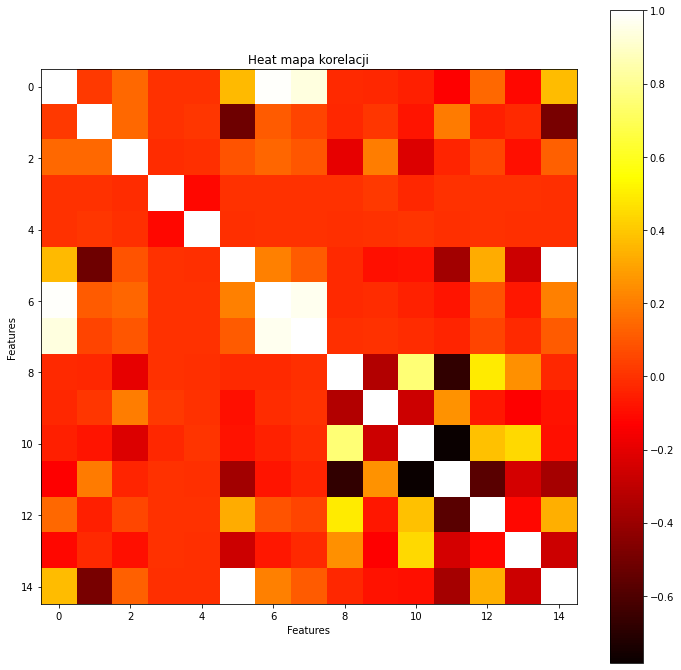

In [26]:
fig = plt.figure(figsize = (12, 12))
ax=plt.imshow(df.corr().values, cmap="hot")
fig.colorbar(ax)
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Heat mapa korelacji")
plt.show()

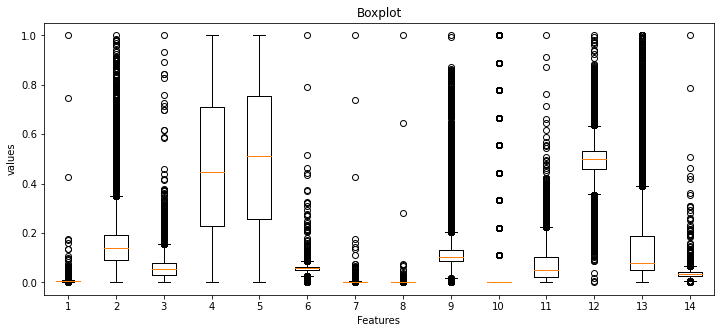

In [27]:
fig = plt.figure(figsize=(12,5))
plt.boxplot(x_reg)
plt.xlabel("Features")
plt.ylabel("values")
plt.title("Boxplot")
plt.show()

In [28]:
def draw_plot(x, y, nc, nr):
    
    #Rysowanie scatterplotow na podstawie danych z csv
    # x- zbiór danych obrobionych
    # y- target
    # nc- liczba kolumn
    # nr- liczba wierszy
    
    fig, ax = plt.subplots(
        nrows=nr,
        ncols=nc,
        figsize=(40,60)
    )
    j = 0 # Pozycjonowanie wierszy
    k = 0 # Pozycjonowanie kolumn
    for i in x.keys():
        ax[j][k].scatter(x = x[:][i], y=y)
        ax[j][k].set_xlabel(i)
        ax[j][k].set_ylabel(y.name)
        ax[j][k].set_title(f"{y.name} vs {i}")
        ax[j][k].legend(["dane"])
        k += 1
        if k == nc:
            k = 0
            j += 1

Wall time: 827 ms


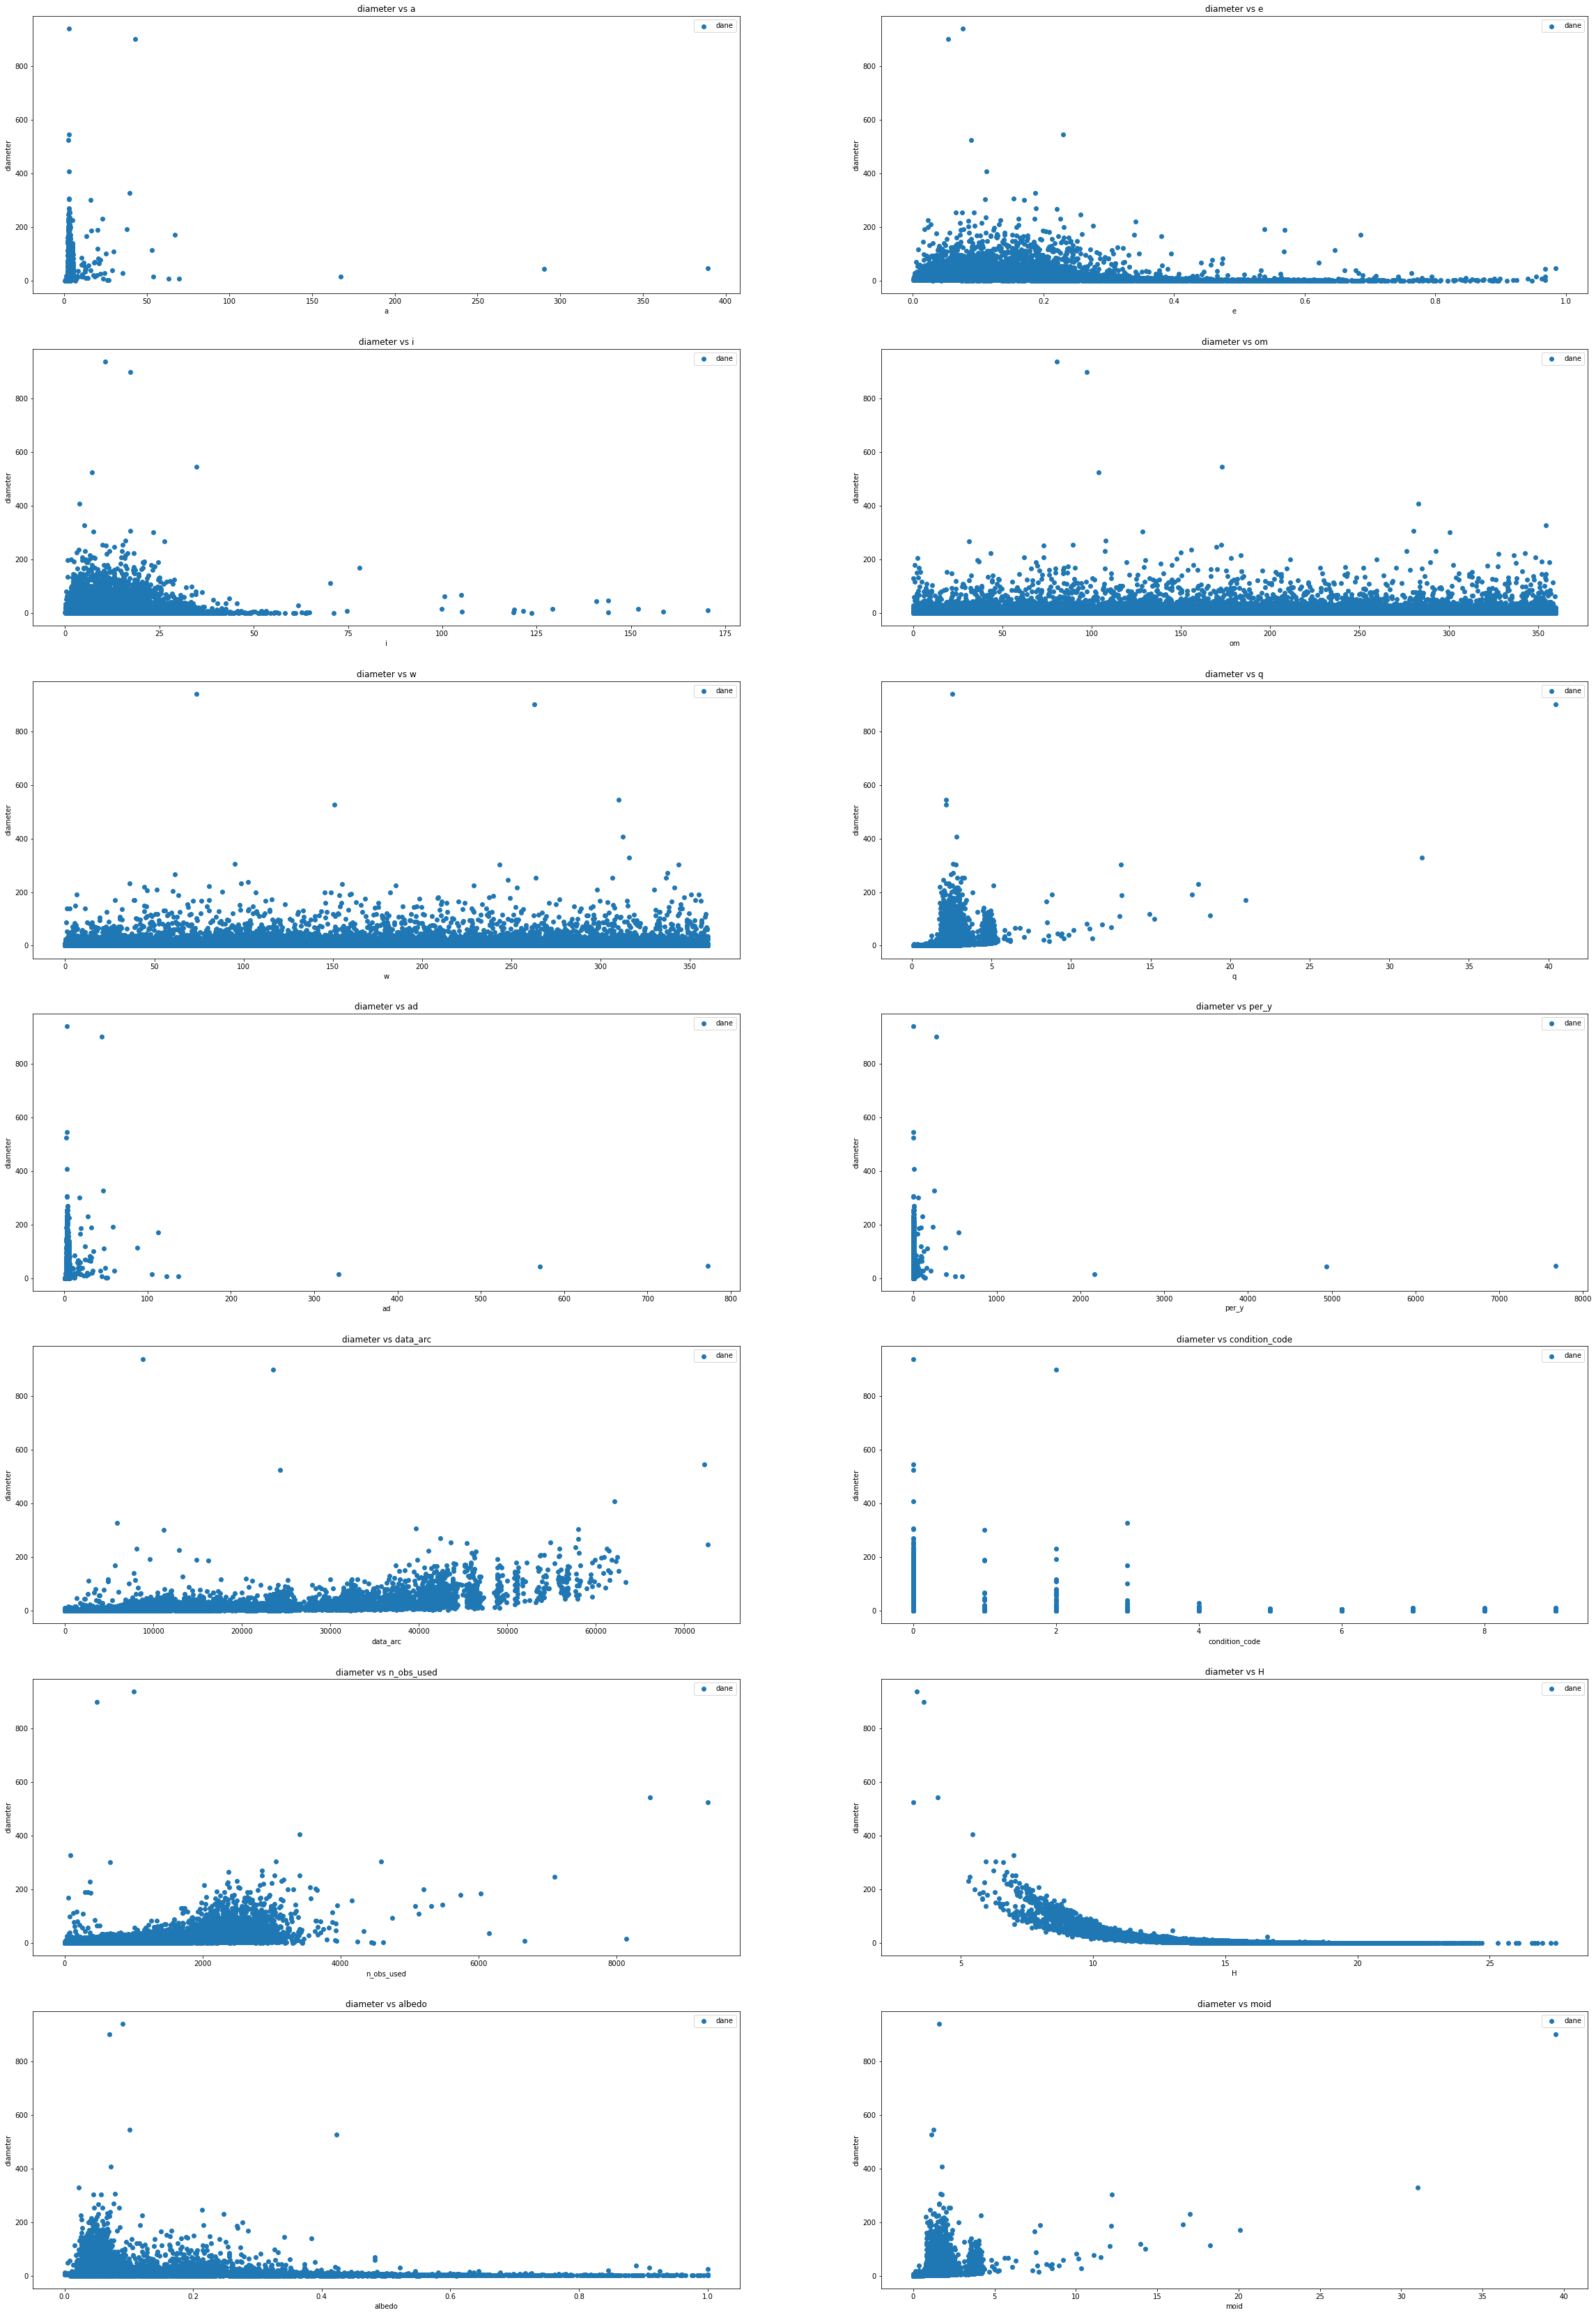

In [29]:
%time draw_plot(x, y, 2, 7)

# Podzielnie danych na treningowe i testowe

In [30]:
#podzielnie danych na treningowe i testowe
regr_data_split = x_train, x_test, y_train, y_test = train_test_split(x_reg, y, test_size=0.3, random_state=521)

# Poszukiwanie najlepszego modelu

In [31]:
# funkcja trenująca model
def trainCV(model, data, target, cv=5):
    
    # przeprowadzamy kross walidację i zbieramy wyniki
    results = cross_validate(model, data, target, cv=cv)
    # zwracamy średnie ze wszystkich przebiegów
    outputDict = {
        'meanFitTime': results['fit_time'].mean(),
        'meanScoreTime': results['score_time'].mean(),
        'meanScore':  results['test_score'].mean()
    }
    return outputDict

In [32]:
def printResultsCharts(results, figsize=(15, 20)):
    
    # pobieramy listę nazw zawartości
    keys = list(results.keys())
    
    # tworzymy kontener na wykresy
    axis_number = len(keys)-1
    fig, axs = plt.subplots(axis_number, 1, figsize=figsize)
    if axis_number > 1:
        for i in range(axis_number):
            axs[i].bar(results[keys[0]],results[keys[i+1]])
            axs[i].set_ylabel(keys[i+1])
            axs[i].set_title(keys[i+1])
            axs[i].set_xlabel(keys[0])
    else:
        axs.bar(results[keys[0]],results[keys[1]])
        axs.set_ylabel(keys[1])
        axs.set_title(keys[1])
        axs.set_xlabel(keys[0])

In [33]:
def TrainAndPrintResults(modelList, dataset, figsize=(15, 20)):
    
    # bierzemy z datasetu dane treningowe
    x_train, x_test, y_train, y_test = dataset
    # pusty słownik na wyniki
    results = {
        "modelName": [],
        "meanScore": [],
        "meanFitTime": [],
        "meanScoreTime": []
    }
    # lecimy po modelach i uczymy
    for oneM in modelList:
        tmpOneRes = trainCV(modelList[oneM], x_train, y_train)
        print("{0} mean train score = {1}".format(oneM,(tmpOneRes['meanScore'])))
        results["modelName"].append(oneM)
        results["meanScore"].append(tmpOneRes['meanScore'])
        results["meanFitTime"].append(tmpOneRes['meanFitTime'])
        results["meanScoreTime"].append(tmpOneRes['meanScoreTime'])
        #finally fit on whole train data
        modelList[oneM].fit(x_train, y_train)
    
    # present results on charts
    printResultsCharts(results, figsize=figsize)

In [34]:
regrModels = {
    #"linear": LinearRegression(),
    "decision_tree": DecisionTreeRegressor(),
    #"random_forest": RandomForestRegressor(),
    "xgboost": XGBRegressor(n_jobs=-1, objective="reg:squarederror"),
    #"svm": SVR(verbose=True),
    #"knn": KNeighborsRegressor()
}

decision_tree mean train score = 0.9127436564062016
xgboost mean train score = 0.9212065811680079


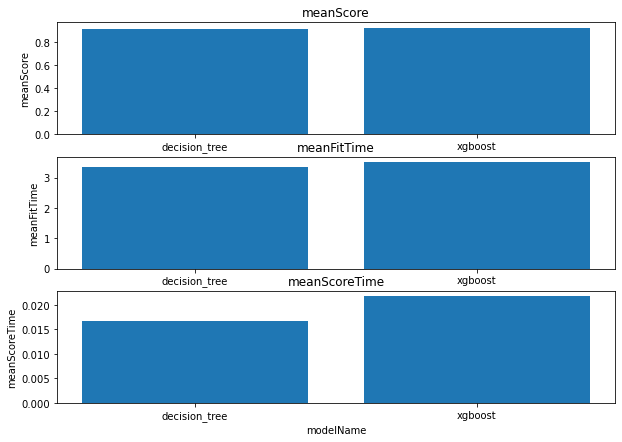

In [35]:
results = TrainAndPrintResults(regrModels, regr_data_split, figsize=(10, 7))

# Poszukiwanie najlepszego parametru dla XGBRegressor

In [36]:
tree_grid_parameter = {
    #'max_depth' : [10, 11, 12]
    #'min_samples_split' : [23, 24, 25], #best train 28
    #'min_samples_leaf' : [2]
}

In [37]:
xgb_grid_parameter = {
    #"max_depth":[7, 8, 9],
    #"seed":[1, 2, 3]
    "n_estimators":[700]
    #"learining_rate":[0.1, 1, 5]
}

In [38]:
def s_grid(g_model, g_param):
    gs = GridSearchCV(
        g_model,
        g_param,
        n_jobs = -1
    )
    return gs

In [39]:
def train_grid(t_model, t_parameter, x, y):
    gs = s_grid(t_model, t_parameter)
    gs.fit(x, y)
    print(f"Najlepsze parametry modelu {t_model}: {gs.best_estimator_}")
    print(f"Najlepszy score: {gs.best_score_}")
    return gs.best_estimator_
    

In [40]:
%time best_model = train_grid(XGBRegressor(n_jobs=-1, objective="reg:squarederror"), xgb_grid_parameter, x_train, y_train)

Najlepsze parametry modelu XGBRegressor(n_jobs=-1, objective='reg:squarederror'): XGBRegressor(n_estimators=700, n_jobs=-1, objective='reg:squarederror')
Najlepszy score: 0.921634986074066
Wall time: 2min 22s


# Sprawdzenie modelu

In [41]:
best_model

XGBRegressor(n_estimators=700, n_jobs=-1, objective='reg:squarederror')

In [42]:
y_train_pred = best_model.predict(x_train)
y_test_pred = best_model.predict(x_test)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE dla danych treningowych: {rmse_train}")

RMSE dla danych treningowych: 0.6637526170286256


In [45]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"RMSE dla danych testowych: {rmse_test}")

RMSE dla danych testowych: 1.160325434075208


In [46]:
r_2 = r2_score(y_train, y_train_pred)
print(f"r^2 dla danych treningowych: {r_2}")

r^2 dla danych treningowych: 0.9951972676359213


In [47]:
r_2_test = r2_score(y_test, y_test_pred)
print(f"r^2 dla danych testowych: {r_2_test}")

r^2 dla danych testowych: 0.9835408918282712


In [48]:
y_train[:10]

198405     2.672
60922      4.641
3107       4.446
257226     6.210
249261     3.041
54732      4.909
109325     8.445
251367     1.318
36185     11.701
224289     1.718
Name: diameter, dtype: float64

In [49]:
y_train_pred[:10]

array([ 2.7408934,  5.317909 ,  4.8973293,  6.4927635,  3.4606426,
        5.204588 ,  7.757951 ,  1.3880522, 11.552735 ,  1.8454785],
      dtype=float32)

In [50]:
y_test[:10]

1326      22.318
243080     4.599
20735     14.819
242716     1.735
100682     7.490
244612     6.399
83251      6.369
634814     2.204
105082     3.030
276630     6.406
Name: diameter, dtype: float64

In [51]:
y_test_pred[:10]

array([27.043684 ,  5.164029 , 15.566095 ,  1.8848765,  7.4124336,
        6.9284587,  7.4290557,  2.3648763,  3.5907986,  5.426757 ],
      dtype=float32)

In [52]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136449 entries, 0 to 810411
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               136449 non-null  float64
 1   e               136449 non-null  float64
 2   i               136449 non-null  float64
 3   om              136449 non-null  float64
 4   w               136449 non-null  float64
 5   q               136449 non-null  float64
 6   ad              136449 non-null  float64
 7   per_y           136449 non-null  float64
 8   data_arc        136449 non-null  float64
 9   condition_code  136449 non-null  float64
 10  n_obs_used      136449 non-null  int64  
 11  H               136449 non-null  float64
 12  albedo          136449 non-null  float64
 13  moid            136449 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 15.6 MB


<Figure size 1080x1080 with 0 Axes>

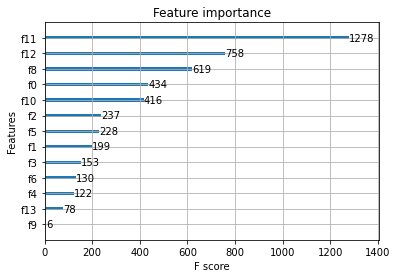

In [53]:
fig = plt.figure(figsize=(15,15))
xgb.plot_importance(best_model)
plt.show()

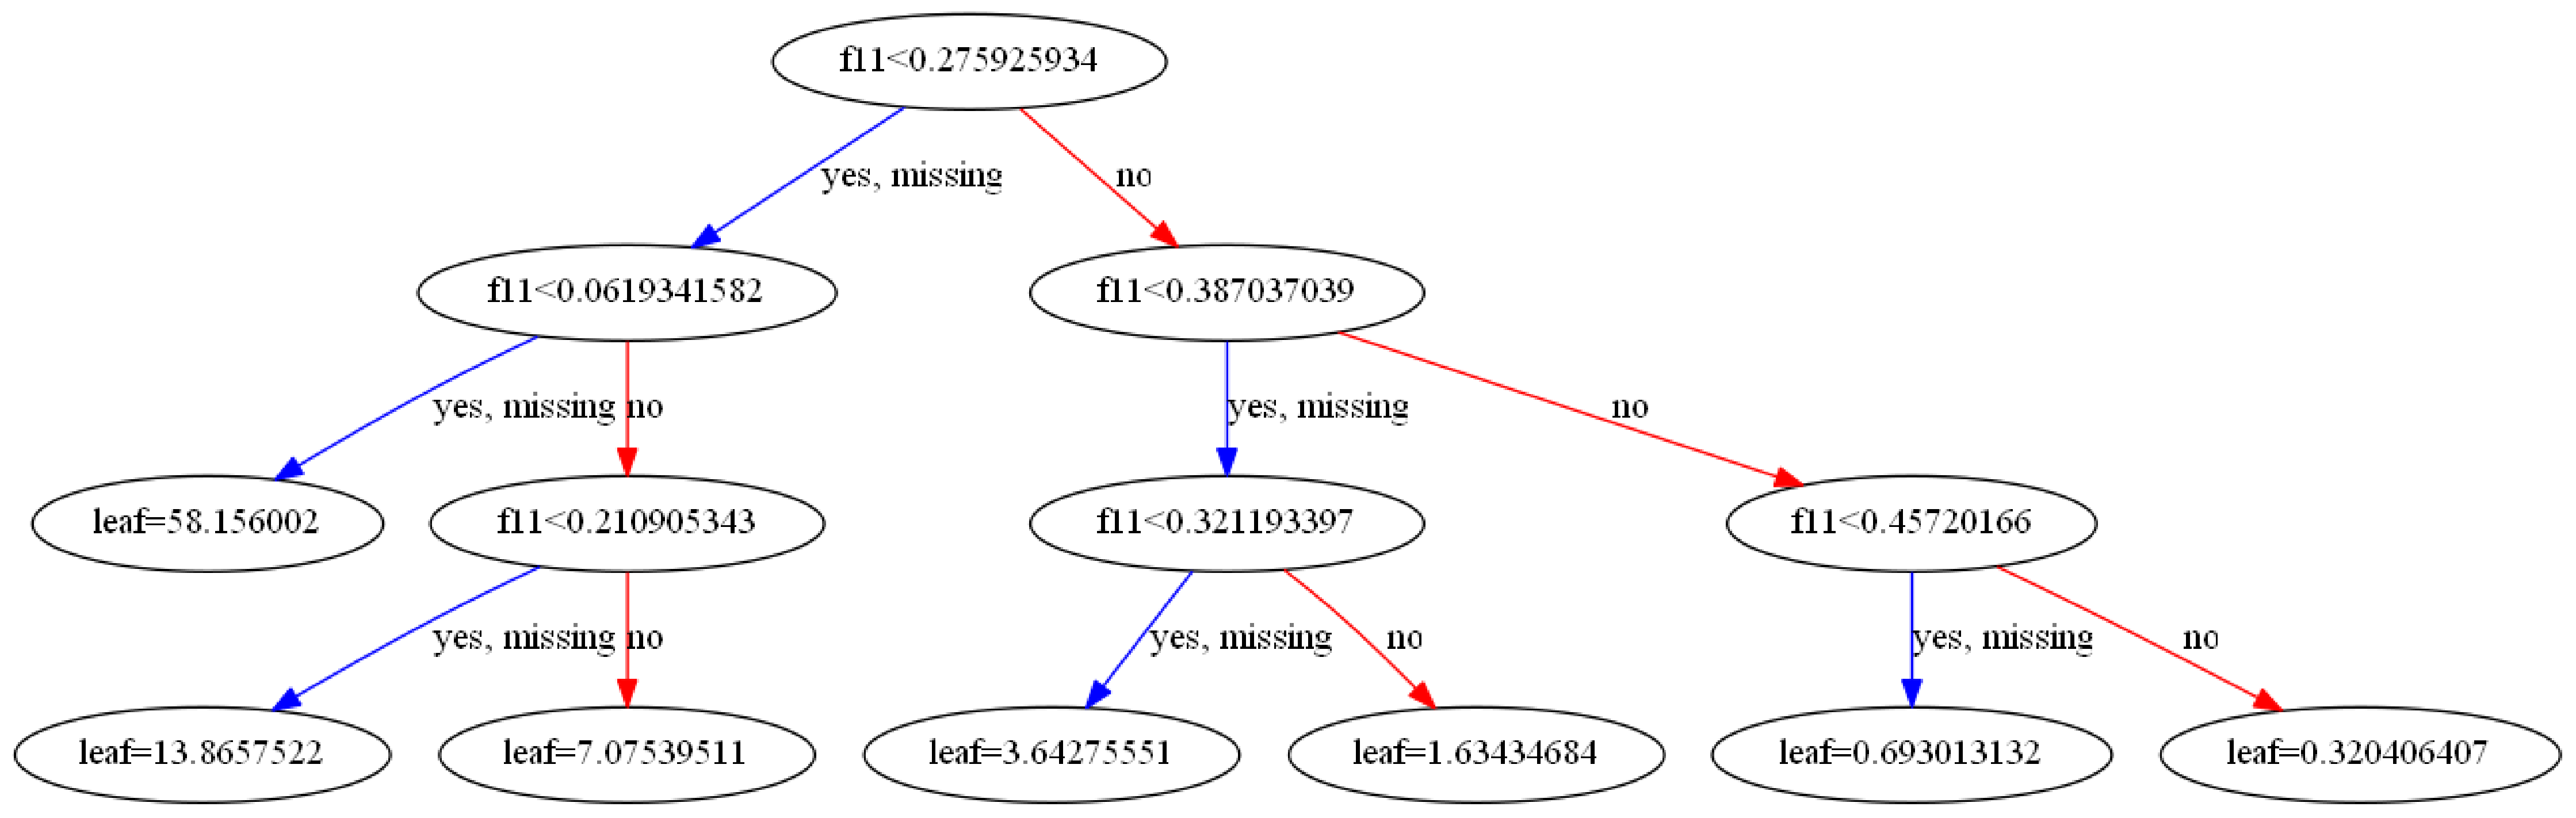

In [54]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50
xgb.plot_tree(best_model)
plt.show()

In [55]:
y_test

1326      22.318
243080     4.599
20735     14.819
242716     1.735
100682     7.490
           ...  
81981      6.164
166262     3.042
19122      2.583
300744     3.648
127329     6.996
Name: diameter, Length: 40935, dtype: float64

In [56]:
y_test_pred

array([27.043684 ,  5.164029 , 15.566095 , ...,  2.473424 ,  3.4455512,
        7.205682 ], dtype=float32)

In [57]:
y_test_arr = y_test.to_numpy()

In [58]:
y_test_arr

array([22.318,  4.599, 14.819, ...,  2.583,  3.648,  6.996])

In [59]:
y_test_res = y_test_pred - y_test_arr
y_test_res

array([ 4.72568401,  0.56502912,  0.74709535, ..., -0.10957604,
       -0.20244884,  0.2096818 ])

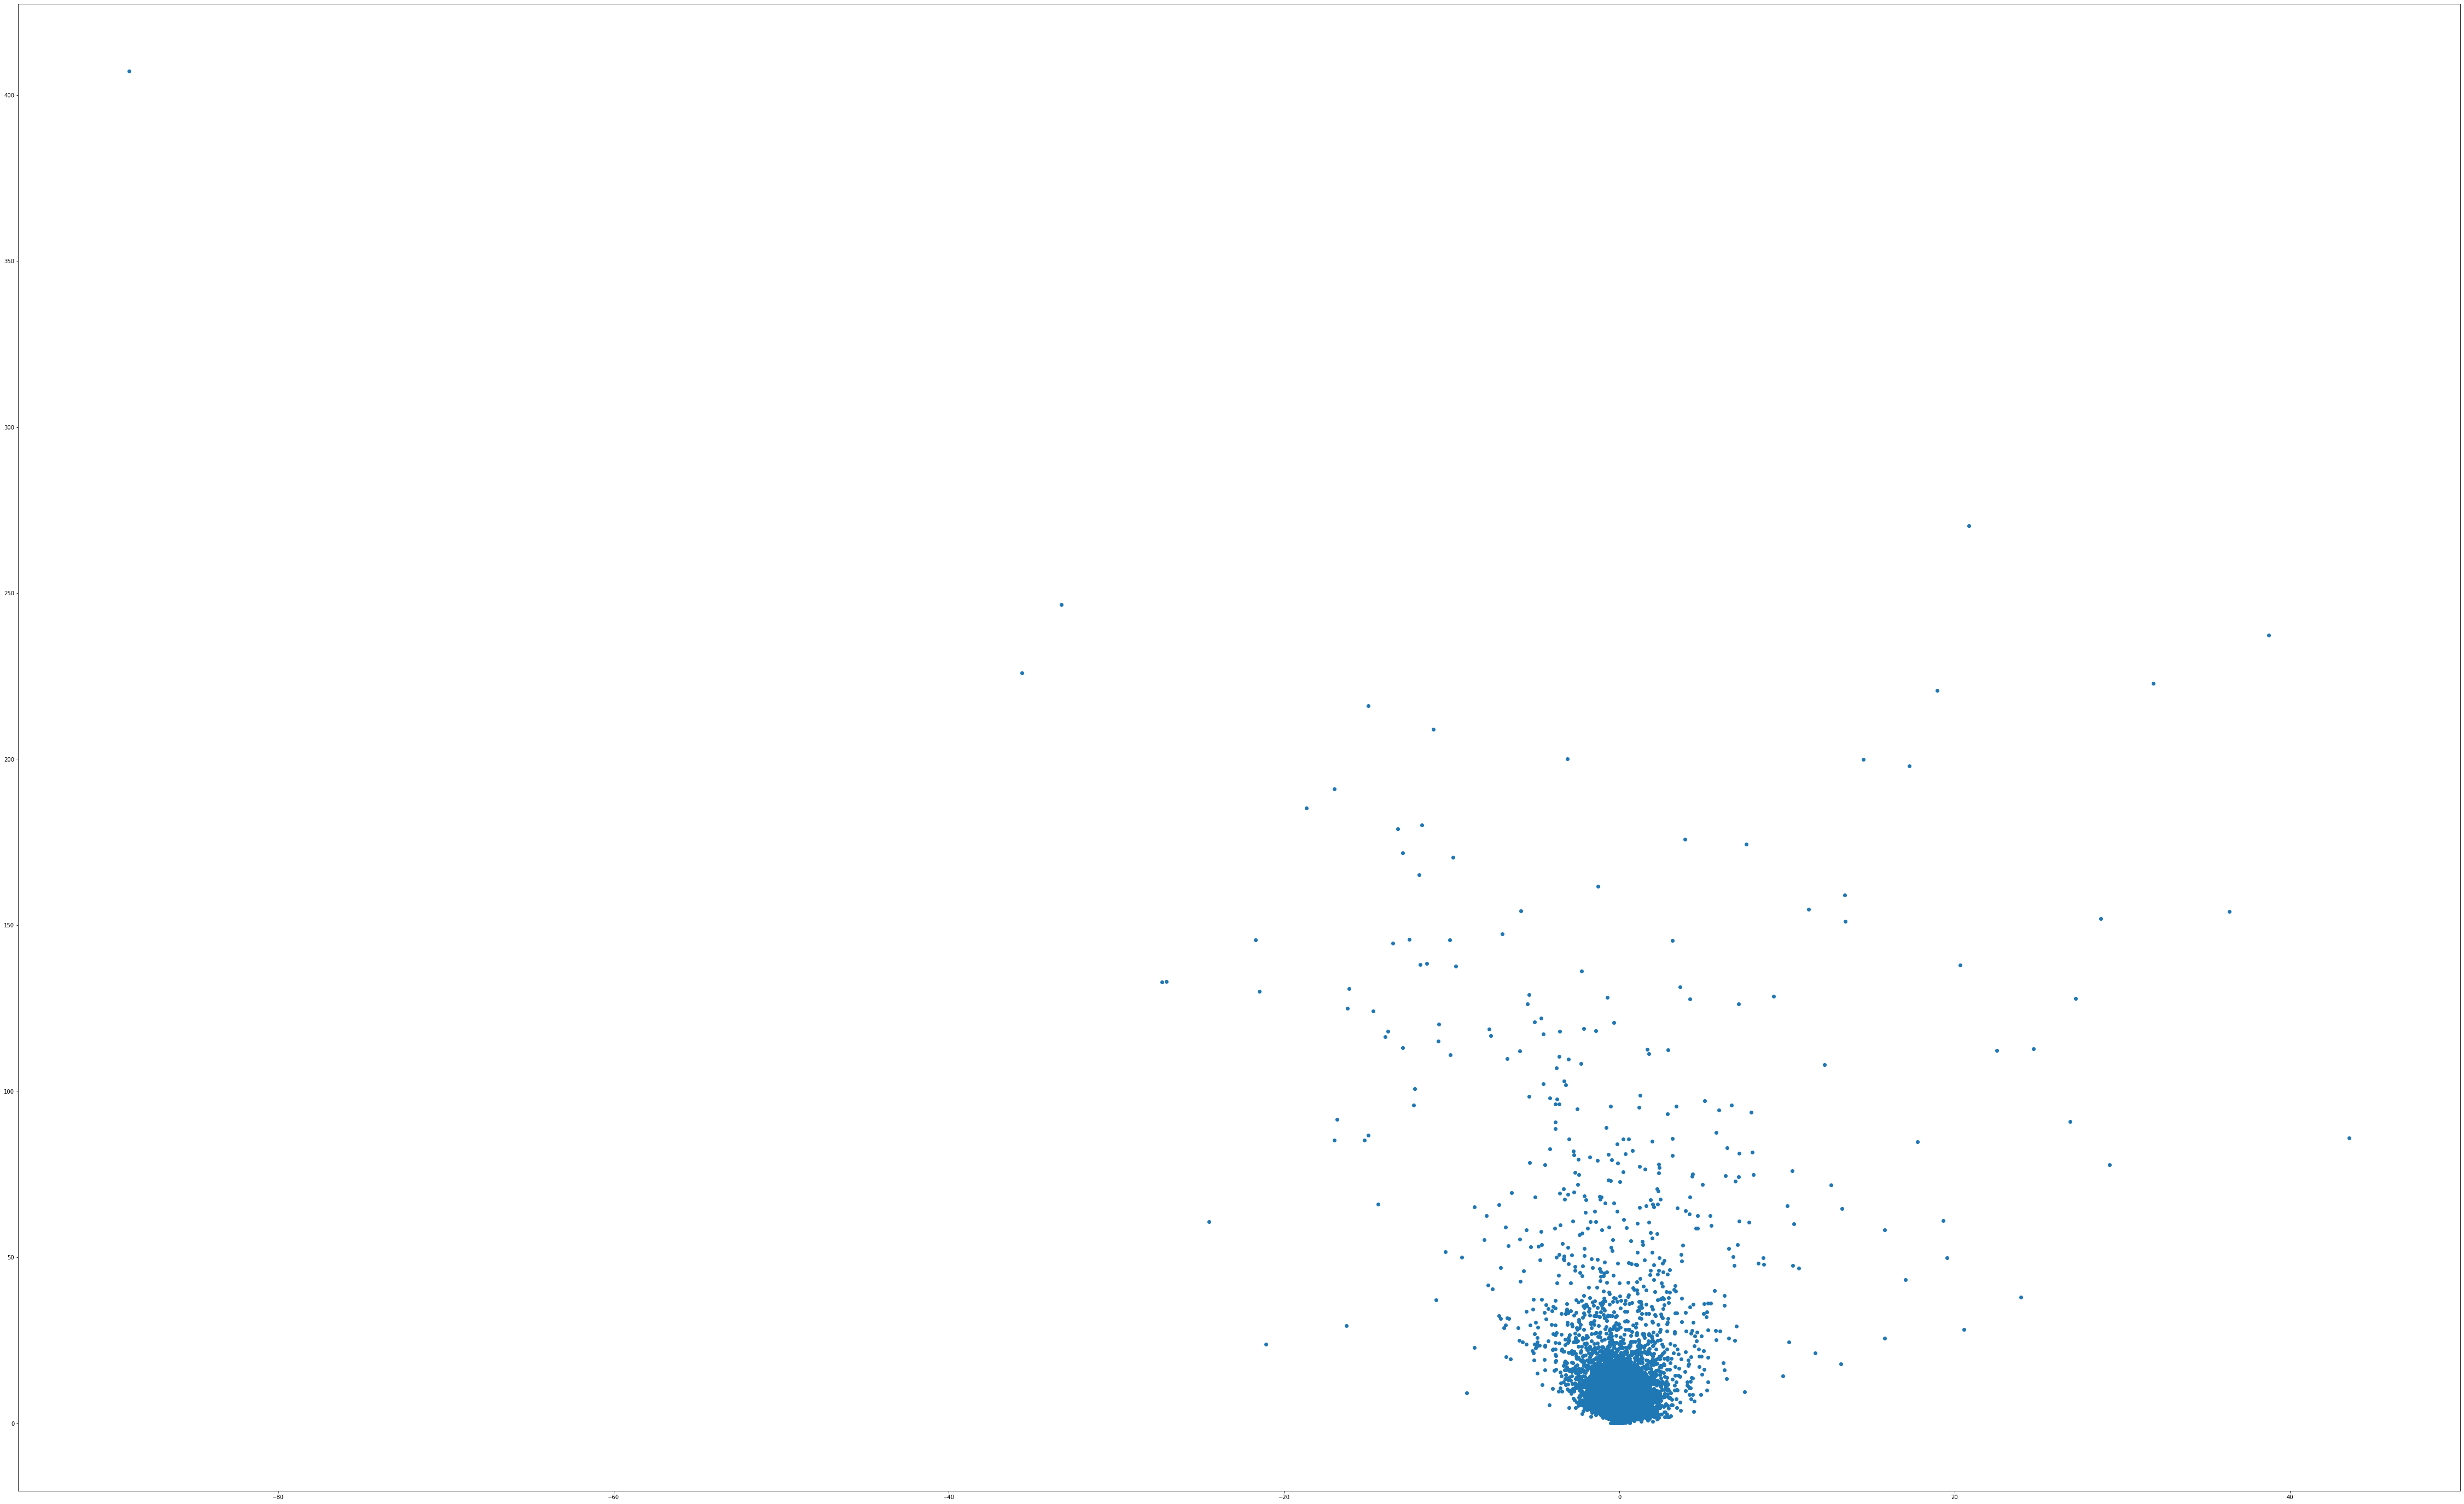

In [63]:
plt.scatter(
    x=y_test_res,
    y=y_test
)
plt.show()

In [67]:
y_res_list = []
for i in y_test_res:
    if i < 0:
        i *= -1
    y_res_list.append(i)

In [71]:
y_res_arr = np.array(y_res_list)
y_res_arr

array([4.72568401, 0.56502912, 0.74709535, ..., 0.10957604, 0.20244884,
       0.2096818 ])

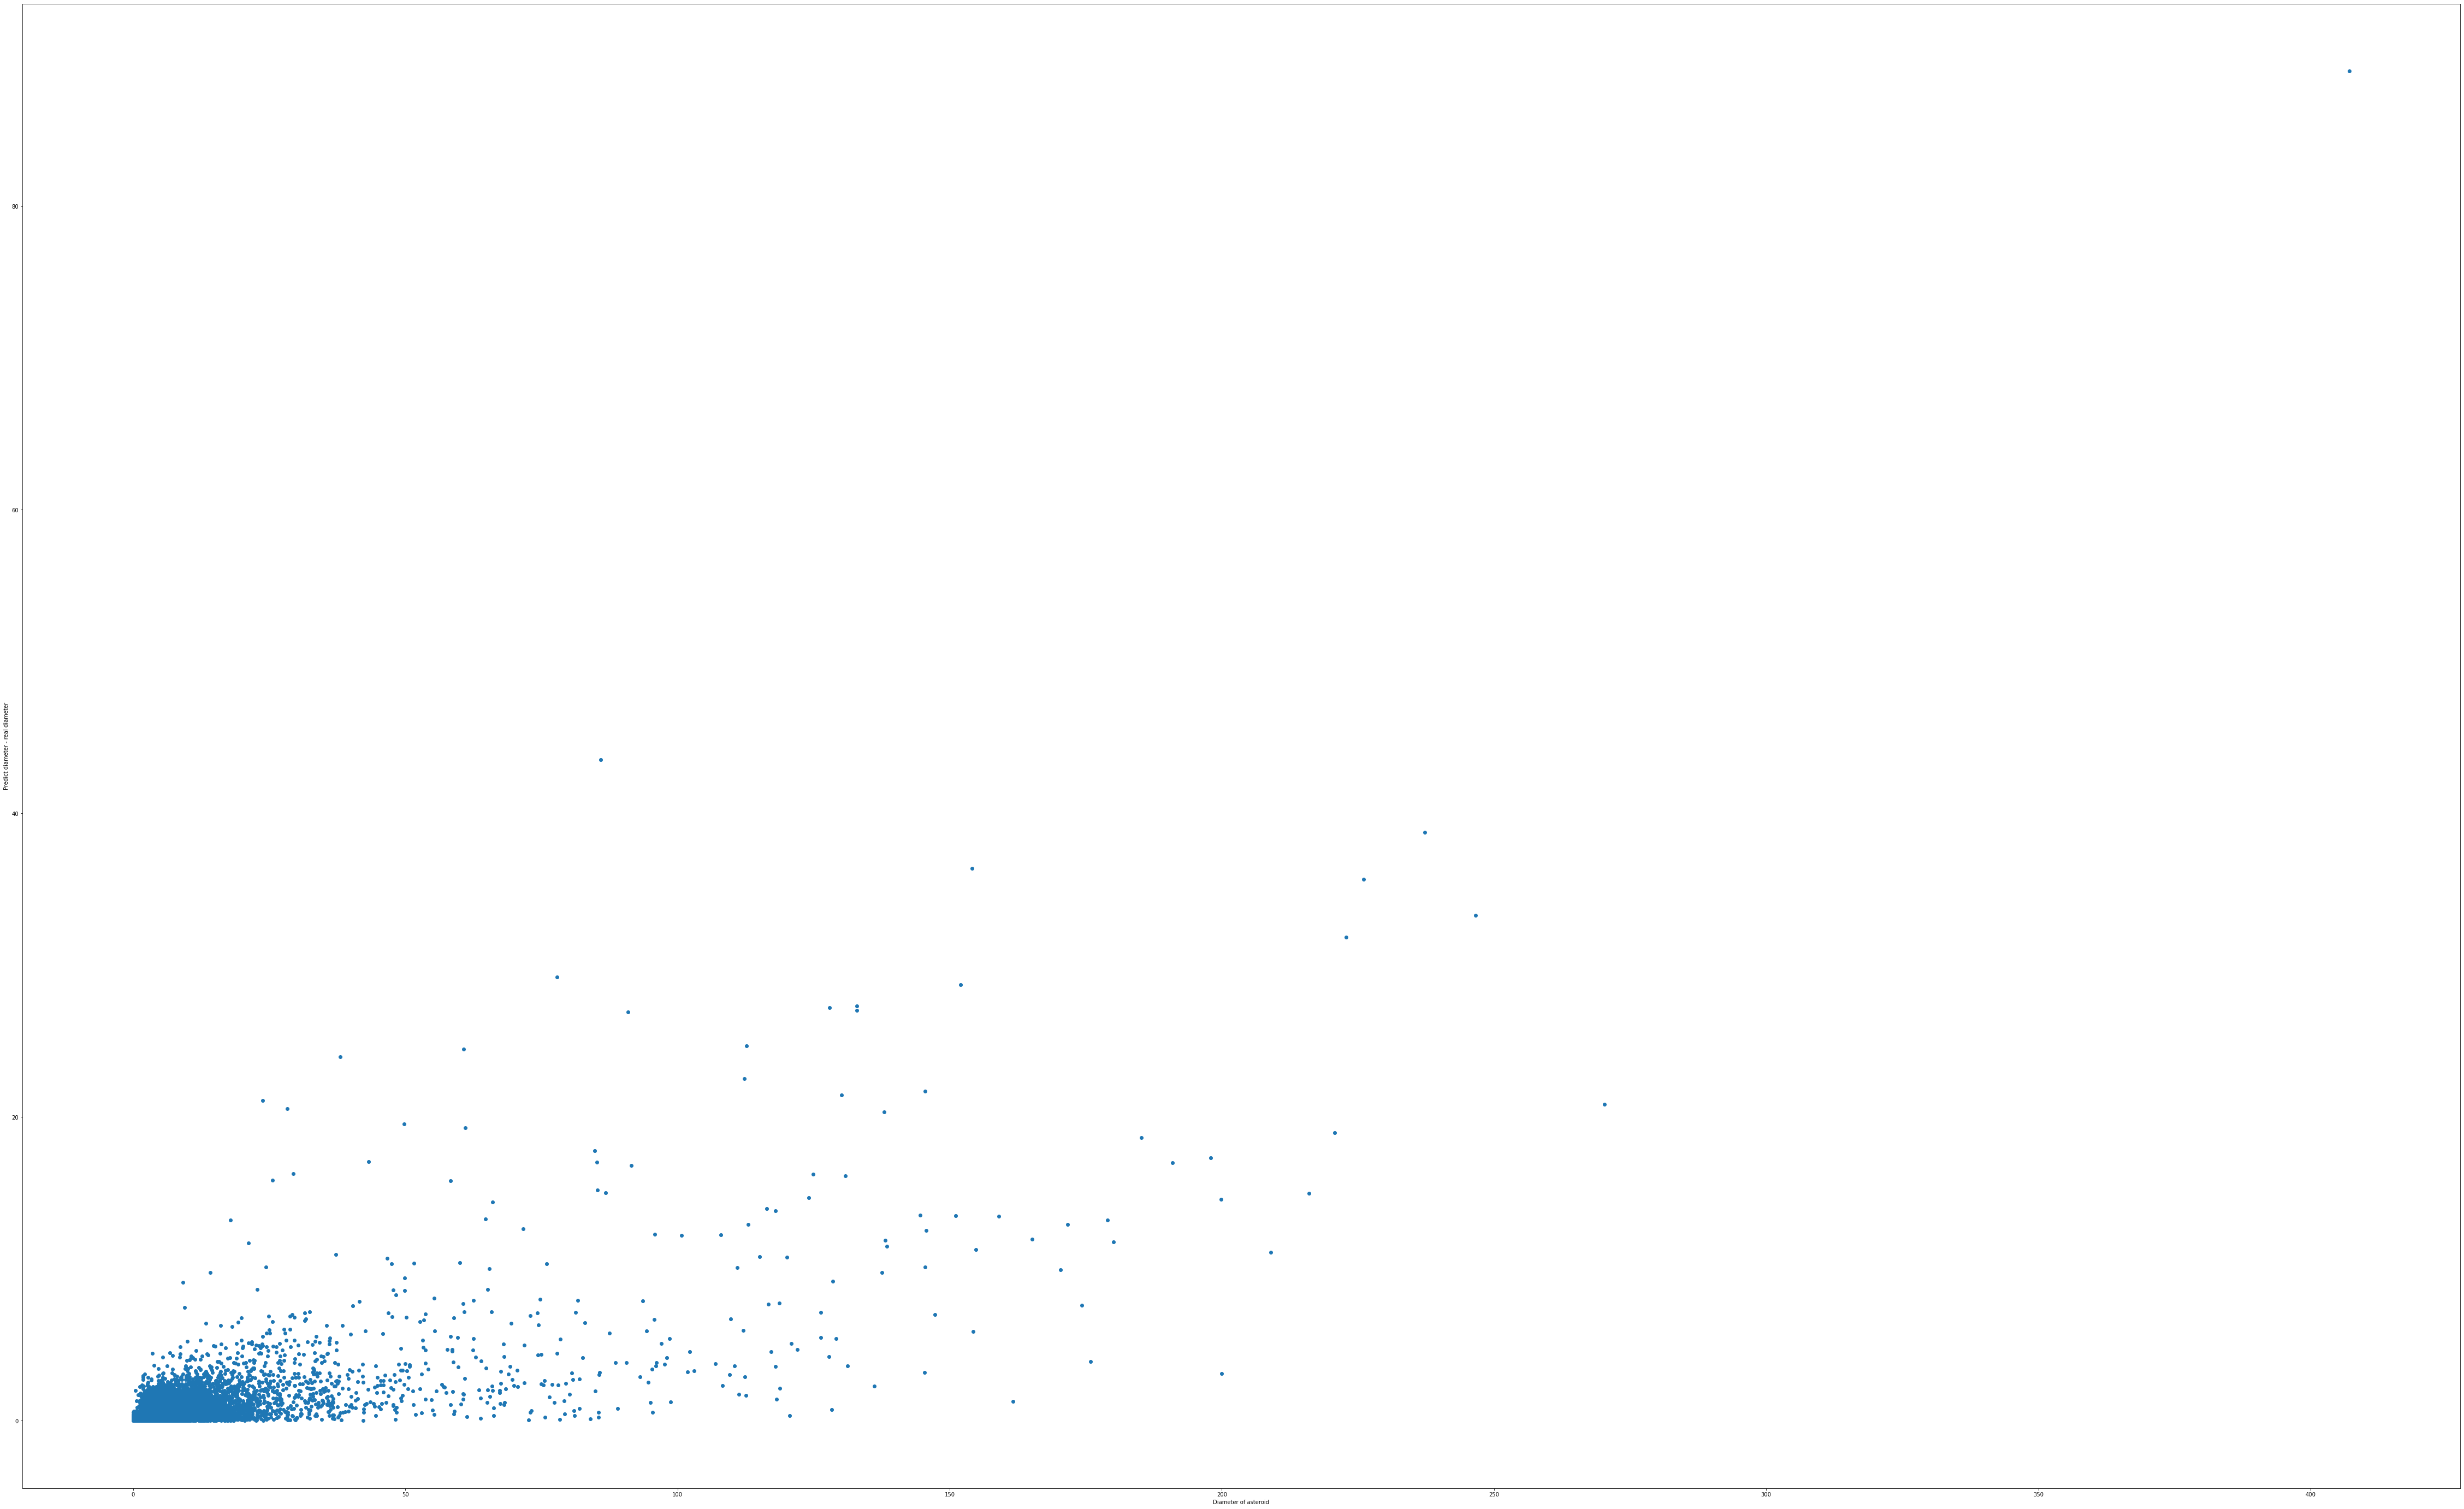

In [76]:
plt.scatter(
    x=y_test,
    y=y_res_arr
)
plt.xlabel("Diameter of asteroid")
plt.ylabel("Predict diameter - real diameter")

plt.show()